### LSA

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [12]:
data=pd.read_csv('lda_content.csv')
data.head(10)

,processed_content
0,kumaha barudak well yuk ramaikan pesta anak no...
1,kustini sri purnomo memiliki strategi jitu men...
2,peraih emas olimpiade tokyo greysia polii bica...
3,kapolri jenderal lisyto sigit prabowo bicara s...
4,menteri bumn erick thohir bicara bangsa indone...
5,iring iringan mobil suv pasukan pengawal presi...
6,remaja palestina umur 14 tahun ditembak mati p...
7,ketua umum pdip megawati soekarnoputri kader m...
8,sekjen pdip hasto kristiyanto berbicara terkai...
9,presiden joko widodo memimpin upacara peringat...


In [13]:
# Vectorize text data
vectorizer = CountVectorizer(max_df=0.85, max_features=1000, min_df=2, stop_words='english')
X = vectorizer.fit_transform(data['processed_content'])

# Perform LSA
lsa_model = TruncatedSVD(n_components=5, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(X)

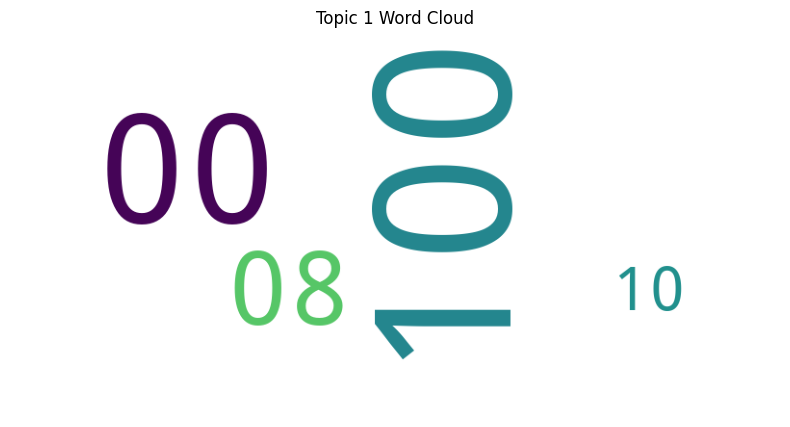

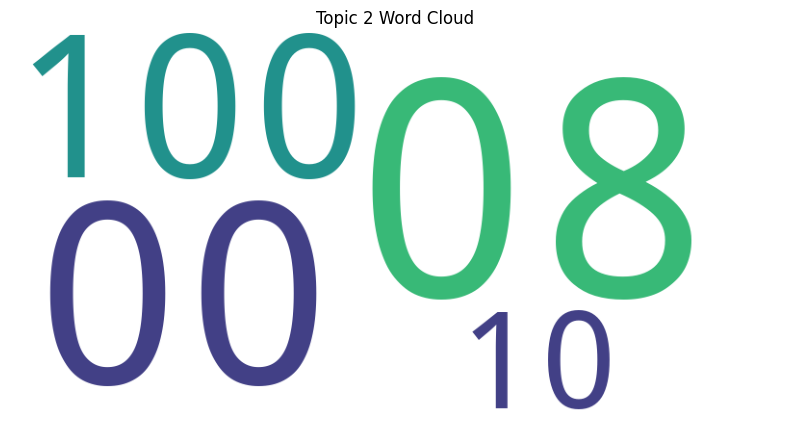

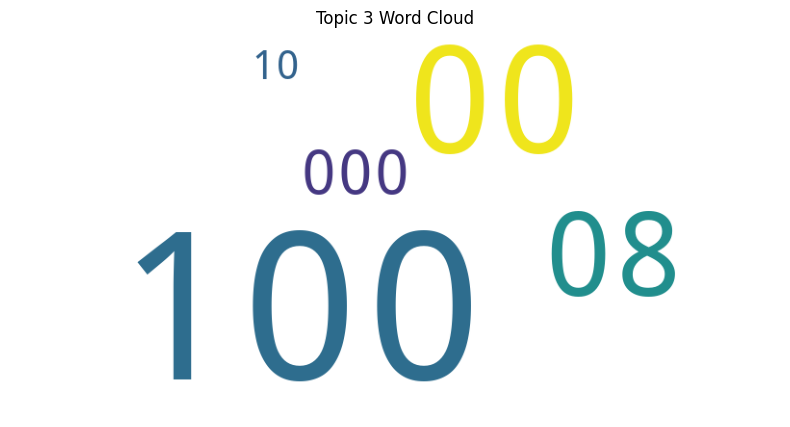

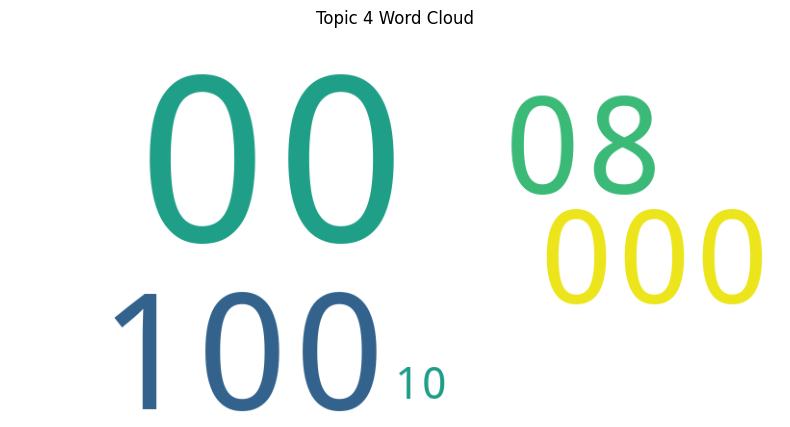

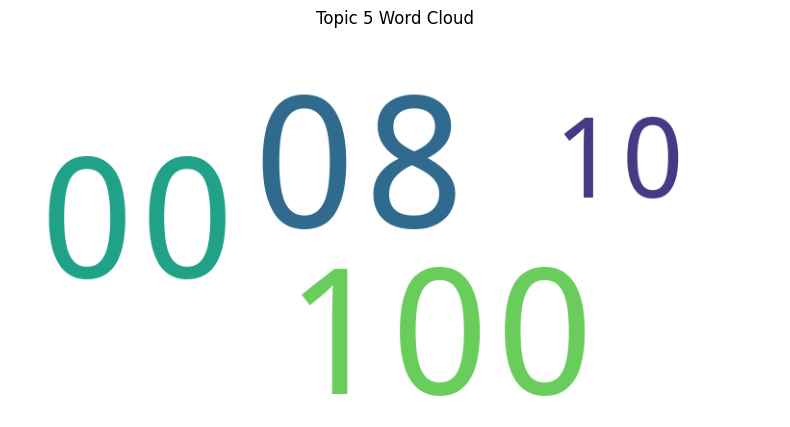

In [15]:
# Word Cloud for each topic
def plot_word_cloud(topic_index, text_matrix, vectorizer):
    word_weights = dict(zip(vectorizer.get_feature_names_out(), text_matrix[:, topic_index]))
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_weights)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Topic {topic_index + 1} Word Cloud")
    plt.show()

for i in range(lsa_model.n_components):
    plot_word_cloud(i, lsa_model.components_, vectorizer)